This notebook is part of [**Byron v0.1**](https://github.com/squillero/byron)  
Copyright 2023 Giovanni Squillero and Alberto Tonda  
SPDX-License-Identifier: [Apache-2.0](https://www.tldrlegal.com/license/apache-license-2-0-apache-2-0) 

In [1]:
import byron

/var/folders/31/dkl97hks2c14b663vl55pt440000gn/T/ipykernel_49647/826285489.py:1: RuntimeWarning: 
  Paranoia checks are enabled in this notebook: performances can be significantly impaired
  [see https://github.com/squillero/byron/blob/pre-alpha/docs/paranoia.md for details]
  import byron


Everything under the namespace `byron.framework` (lazy fingers can use `byron.f`).

# Global References

Global references specify the target frame (notez bien: a frame may contains sub frames)

## *Internal* Global References

A reference to a different frame in the same subtree

In [2]:
macro_foo = byron.f.macro('foo #{num:04x}', num=byron.f.integer_parameter(0, 2**16))
macro_bar = byron.f.macro('bar {num:+0.3e}', num=byron.f.float_parameter(-1, 1))

foo_bunch = byron.f.bunch([macro_foo], size=5)
macro_ref = byron.f.macro('global_ref: {ref}', ref=byron.f.global_reference(foo_bunch))
ref_bunch = byron.f.bunch([macro_ref], size=3)
program = byron.f.sequence([foo_bunch, ref_bunch])
byron.f.show(program)

; 🖋 n1 ➜ Frame❬FrameSequence#1❭
; 🖋 n1.n2 ➜ Frame❬MacroArray#1❭
foo #dbcd  ; 🖋 n1.n2.n3 ➜ Macro❬User#1❭
foo #b286  ; 🖋 n1.n2.n4 ➜ Macro❬User#1❭
n5:
foo #181c  ; 🖋 n1.n2.n5 ➜ Macro❬User#1❭
n6:
foo #f9c2  ; 🖋 n1.n2.n6 ➜ Macro❬User#1❭
foo #c2da  ; 🖋 n1.n2.n7 ➜ Macro❬User#1❭
; 🖋 n1.n8 ➜ Frame❬MacroArray#2❭
global_ref: n6  ; 🖋 n1.n8.n9 ➜ Macro❬User#3❭
global_ref: n6  ; 🖋 n1.n8.n10 ➜ Macro❬User#3❭
global_ref: n5  ; 🖋 n1.n8.n11 ➜ Macro❬User#3❭


/Users/giovanni/Repos/byron/byron/classes/individual.py:774: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(


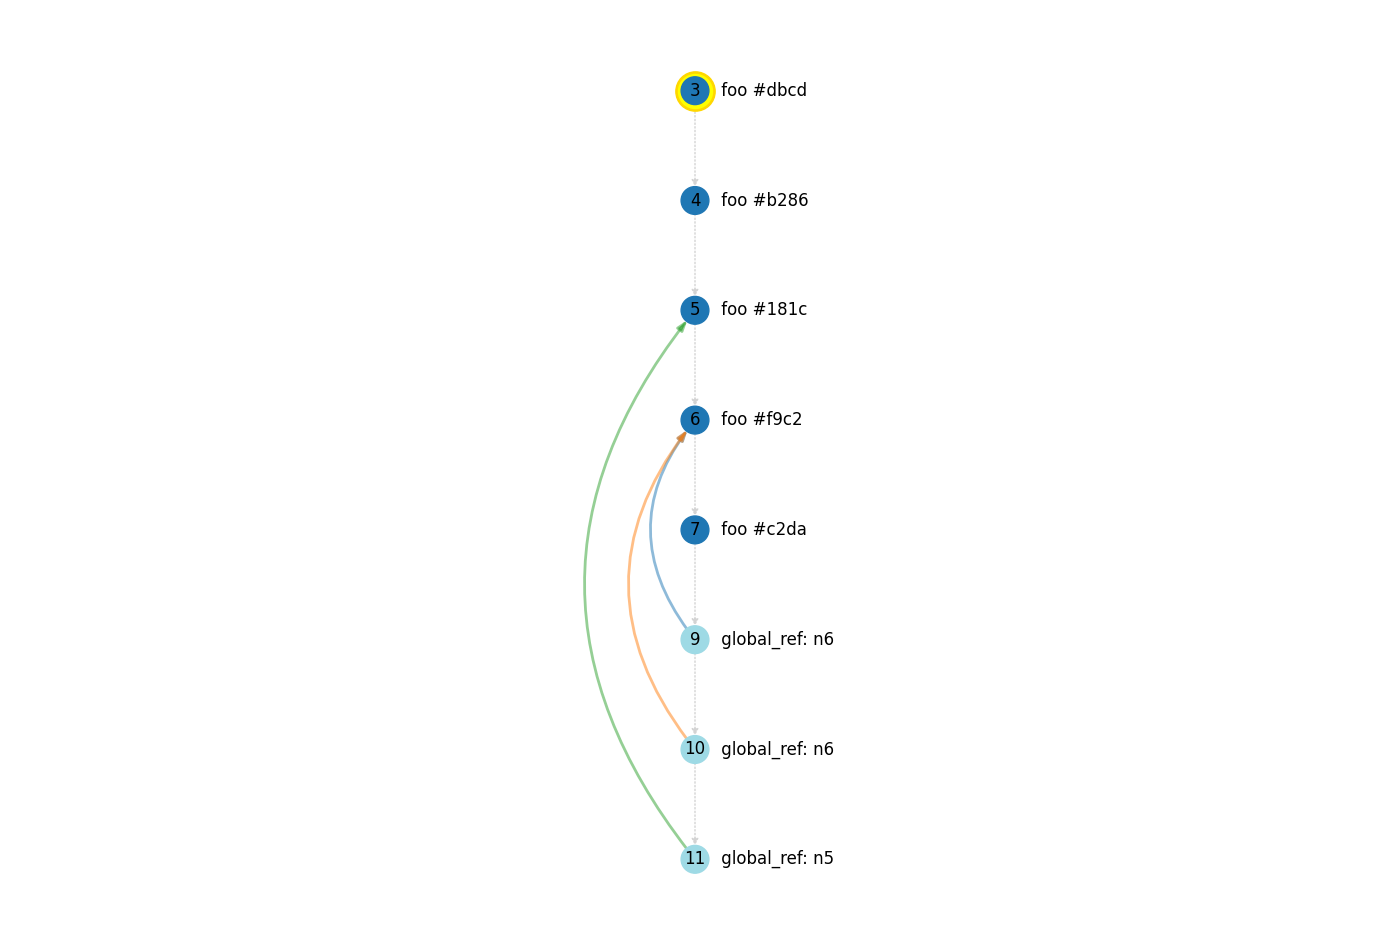

In [3]:
byron.f.show(program, as_lgp=True)

## *External* Global References

A reference to a different frame in a different subtree. The `global_reference` must be allowed to create new frames

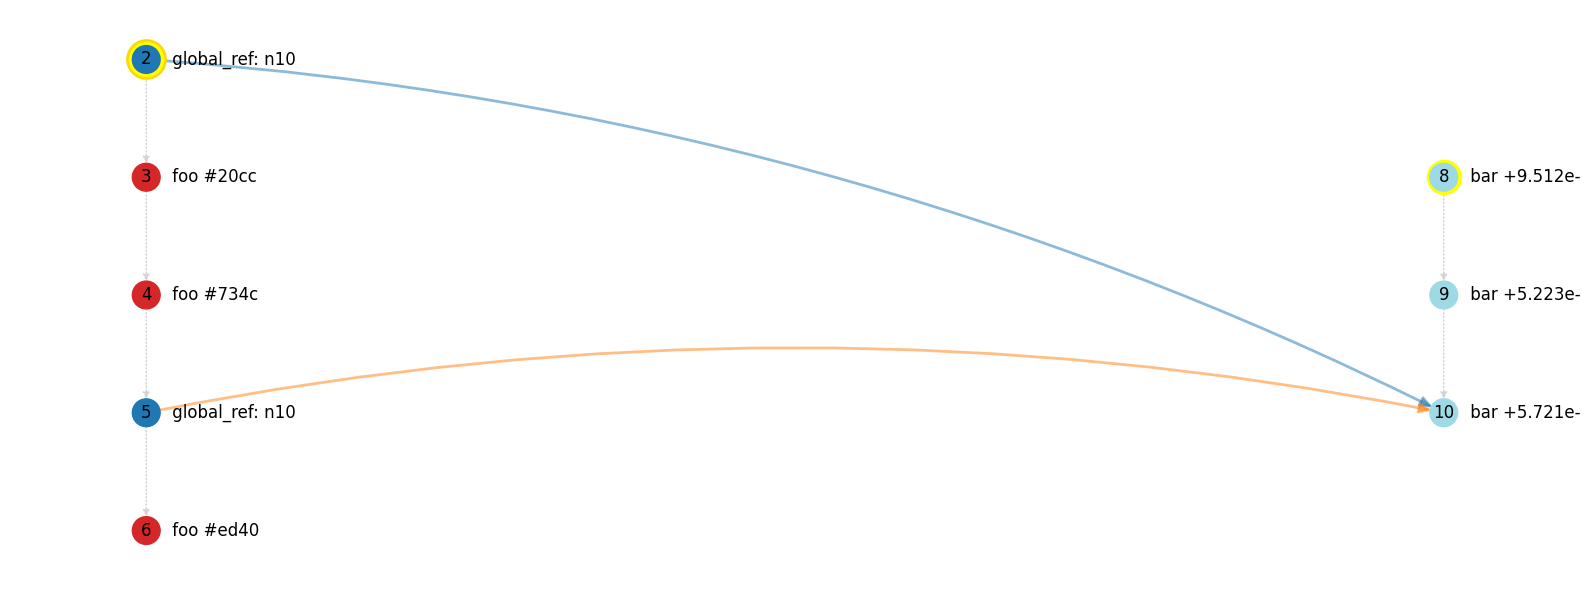

In [4]:
macro_foo = byron.f.macro('foo #{num:04x}', num=byron.f.integer_parameter(0, 2**16))
macro_bar = byron.f.macro('bar {num:+0.3e}', num=byron.f.float_parameter(-1, 1))
macro_ref = byron.f.macro('global_ref: {ref}', ref=byron.f.global_reference('external_bar', creative_zeal=1))
main_frame = byron.f.bunch([macro_foo, macro_ref], size=5)
external_frame = byron.f.bunch([macro_bar], size=3, name='external_bar')
byron.f.show(main_frame, as_lgp=True)

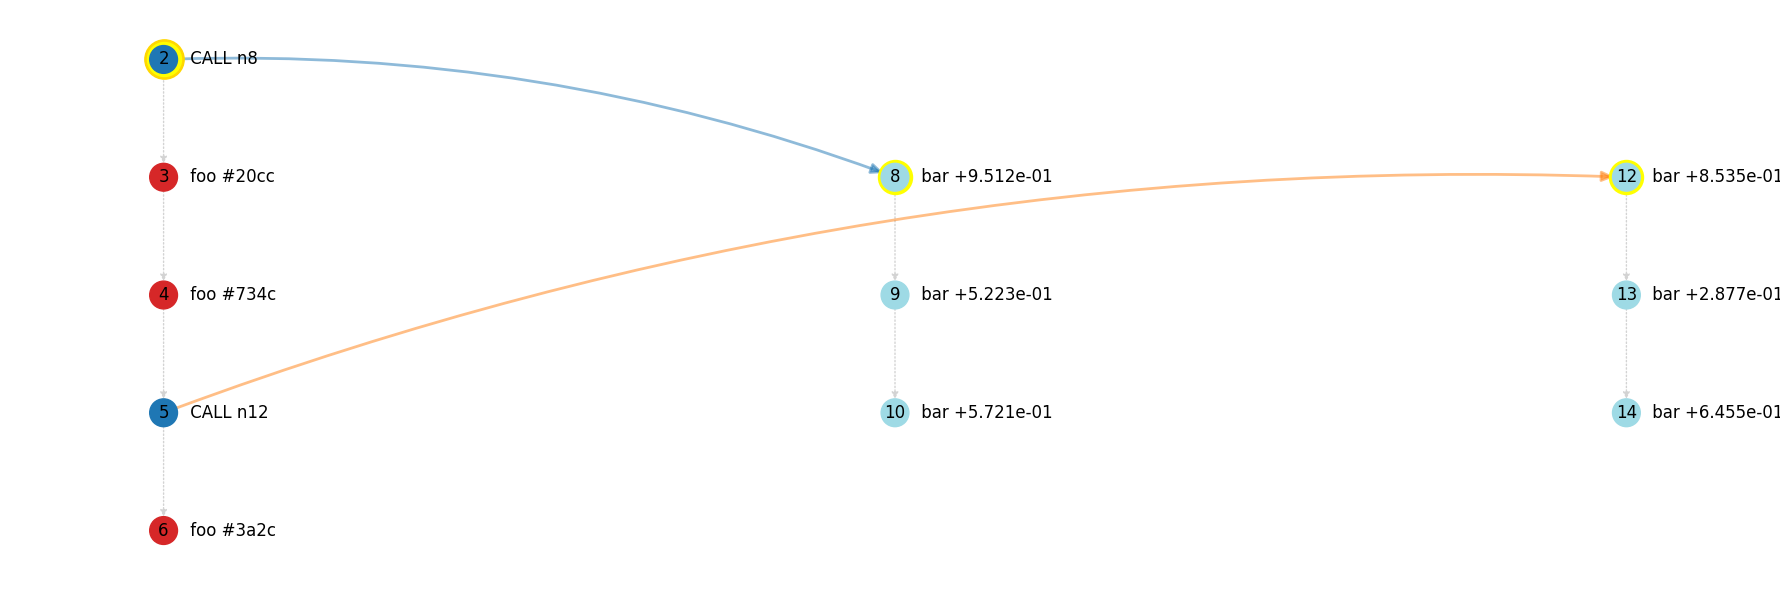

In [5]:
macro_ref = byron.f.macro('CALL {ref}', ref=byron.f.global_reference('external_bar', first_macro=True, creative_zeal=1))
main_frame = byron.f.bunch([macro_foo, macro_ref], size=5)
byron.f.show(main_frame, as_lgp=True)

External frames are dumped after the main one.

In [6]:
byron.f.show(main_frame, node_info=False)

CALL n8
foo #20cc
foo #734c
CALL n12
foo #3a2c
n8:
bar +9.512e-01
bar +5.223e-01
bar +5.721e-01
n12:
bar +8.535e-01
bar +2.877e-01
bar +6.455e-01


Labels may be tweaked in different ways

In [7]:
macro_ref = byron.f.macro(
    'global_ref: {ref}', ref=byron.f.global_reference('external_bar_2', first_macro=True, creative_zeal=1)
)
external_frame = byron.f.bunch(
    [macro_bar], size=3, name='external_bar_2', extra_parameters={'_label': 'PROC {_node}:\n'}
)
main_frame = byron.f.bunch([macro_foo, macro_ref], size=5)
byron.f.show(main_frame, node_info=False)

global_ref: n8
foo #20cc
foo #734c
global_ref: n12
foo #3a2c
PROC n8:
bar +9.512e-01
bar +5.223e-01
bar +5.721e-01
PROC n12:
bar +8.535e-01
bar +2.877e-01
bar +6.455e-01


In [8]:
# MUCH BETTER!
macro_ref = byron.f.macro(
    'CALL {ref}', ref=byron.f.global_reference('external_bar_3', first_macro=True, creative_zeal=1)
)
proc_start = byron.f.macro('BETTER_PROC {_node}:\n', _label='')
external_frame = byron.f.sequence([proc_start, byron.f.bunch([macro_bar], size=3)], name='external_bar_3')
main_frame = byron.f.bunch([macro_foo, macro_ref], size=5)
byron.f.show(main_frame)

; 🖋 n1 ➜ Frame❬MacroArray#7❭
CALL n8  ; 🖋 n1.n2 ➜ Macro❬User#7❭
foo #20cc  ; 🖋 n1.n3 ➜ Macro❬User#1❭
foo #734c  ; 🖋 n1.n4 ➜ Macro❬User#1❭
CALL n14  ; 🖋 n1.n5 ➜ Macro❬User#7❭
foo #3a2c  ; 🖋 n1.n6 ➜ Macro❬User#1❭
; 🖋 n7 ➜ Frame<external_bar_3>
BETTER_PROC n8:
  ; 🖋 n7.n8 ➜ Macro❬Text#1❭
; 🖋 n7.n9 ➜ Frame❬MacroArray#6❭
bar +9.512e-01  ; 🖋 n7.n9.n10 ➜ Macro❬User#2❭
bar +5.223e-01  ; 🖋 n7.n9.n11 ➜ Macro❬User#2❭
bar +5.721e-01  ; 🖋 n7.n9.n12 ➜ Macro❬User#2❭
; 🖋 n13 ➜ Frame<external_bar_3>
BETTER_PROC n14:
  ; 🖋 n13.n14 ➜ Macro❬Text#1❭
; 🖋 n13.n15 ➜ Frame❬MacroArray#6❭
bar +8.535e-01  ; 🖋 n13.n15.n16 ➜ Macro❬User#2❭
bar +2.877e-01  ; 🖋 n13.n15.n17 ➜ Macro❬User#2❭
bar +6.455e-01  ; 🖋 n13.n15.n18 ➜ Macro❬User#2❭


The order may be forced

In [9]:
placeholder = byron.f.macro('')
macro_ref = byron.f.macro(
    'CALL {ref}', ref=byron.f.global_reference('external_bar_4', first_macro=True, creative_zeal=1)
)
proc_start = byron.f.macro('EVEN_BETTER_PROC {_node}:\n', _label='')
external_frame = byron.f.sequence([proc_start, byron.f.bunch([macro_bar], size=3)], name='external_bar_4')
external_frame.FORCED_PARENT = placeholder
main_frame = byron.f.sequence([placeholder, byron.f.bunch([macro_foo, macro_ref], size=5)])
byron.f.show(main_frame)

; 🖋 n1 ➜ Frame❬FrameSequence#2❭
  ; 🖋 n1.n2 ➜ Macro❬Text#2❭
; 🖋 n9 ➜ Frame<external_bar_4>
EVEN_BETTER_PROC n10:
  ; 🖋 n9.n10 ➜ Macro❬Text#3❭
; 🖋 n9.n11 ➜ Frame❬MacroArray#8❭
bar +9.512e-01  ; 🖋 n9.n11.n12 ➜ Macro❬User#2❭
bar +5.223e-01  ; 🖋 n9.n11.n13 ➜ Macro❬User#2❭
bar +5.721e-01  ; 🖋 n9.n11.n14 ➜ Macro❬User#2❭
; 🖋 n15 ➜ Frame<external_bar_4>
EVEN_BETTER_PROC n16:
  ; 🖋 n15.n16 ➜ Macro❬Text#3❭
; 🖋 n15.n17 ➜ Frame❬MacroArray#8❭
bar +8.535e-01  ; 🖋 n15.n17.n18 ➜ Macro❬User#2❭
bar +2.877e-01  ; 🖋 n15.n17.n19 ➜ Macro❬User#2❭
bar +6.455e-01  ; 🖋 n15.n17.n20 ➜ Macro❬User#2❭
; 🖋 n1.n3 ➜ Frame❬MacroArray#9❭
CALL n10  ; 🖋 n1.n3.n4 ➜ Macro❬User#8❭
foo #20cc  ; 🖋 n1.n3.n5 ➜ Macro❬User#1❭
foo #734c  ; 🖋 n1.n3.n6 ➜ Macro❬User#1❭
CALL n16  ; 🖋 n1.n3.n7 ➜ Macro❬User#8❭
foo #3a2c  ; 🖋 n1.n3.n8 ➜ Macro❬User#1❭


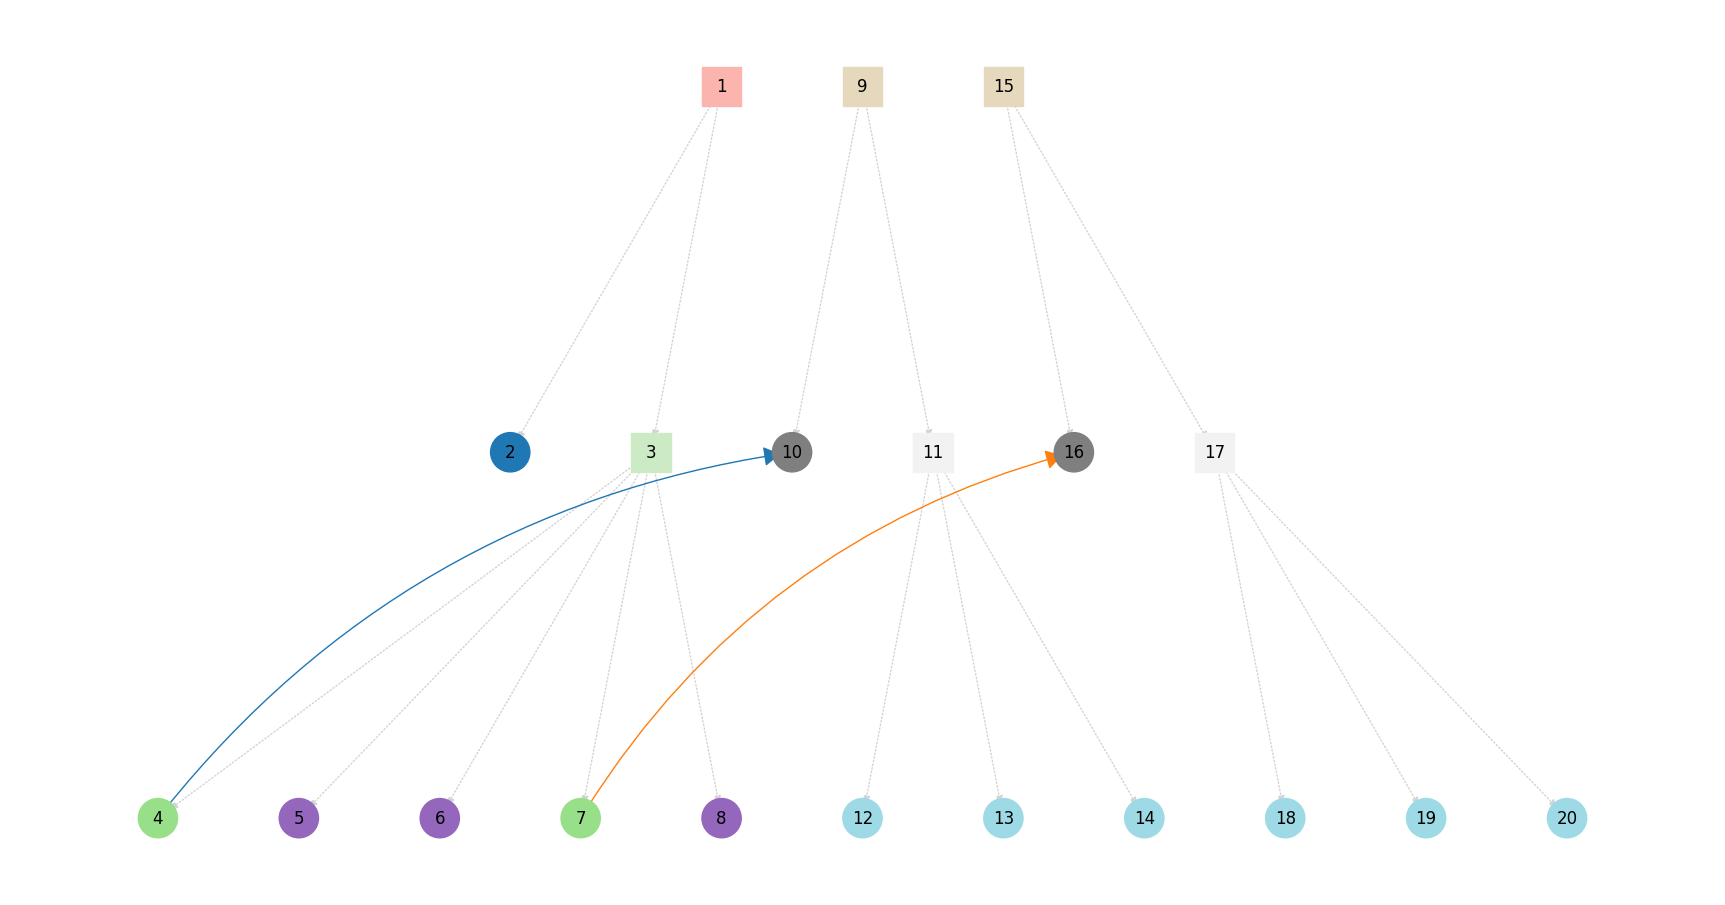

In [10]:
byron.f.show(main_frame, as_forest=True)